In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Constants
CONFIG_FILE = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
FROZEN_MODEL = 'frozen_inference_graph.pb'
LABEL_FILE = 'label.txt'
VIDEO_FILE = '7.mp4'
CONF_THRESHOLD = 0.55

# Load class labels
with open(LABEL_FILE, 'rt') as f:
    class_labels = f.read().rstrip('\n').split('\n')

# Initialize model
model = cv2.dnn_DetectionModel(FROZEN_MODEL, CONFIG_FILE)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# Function to perform object detection on an image
def detect_objects(image):
    class_indices, confidences, boxes = model.detect(image, confThreshold=CONF_THRESHOLD)
    if class_indices is not None and len(class_indices) > 0:
        for class_index, confidence, box in zip(class_indices.flatten(), confidences.flatten(), boxes):
            class_name = class_labels[class_index - 1]  # Adjust for 0-based index
            if class_name == 'person' and confidence > 0.5:  # Adjust confidence threshold as needed
                cv2.rectangle(image, box, (255, 0, 0), 2)
                cv2.putText(image, class_name, (box[0] + 10, box[1] + 40),
                            cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), thickness=3)
            elif class_name == 'traffic light' and confidence > 0.5:  # Adjust confidence threshold as needed
                cv2.rectangle(image, box, (0, 255, 0), 2)
                cv2.putText(image, class_name, (box[0] + 10, box[1] + 40),
                            cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), thickness=3)
    return image


# Function to detect traffic signal state
def detect_traffic_signal(frame):
    # Convert frame to HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Define lower and upper bounds for green color (in HSV)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv_frame, lower_green, upper_green)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contours are found
    if contours:
        # Assuming the largest contour corresponds to the traffic signal
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate bounding box for the contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Assuming the traffic signal is in the upper part of the frame
        signal_region = frame[y:y+h//2, x:x+w]
        
        # Calculate mean intensity in the signal region
        mean_intensity = np.mean(signal_region)
        
        # Determine traffic signal state based on mean intensity
        if mean_intensity > 100:  # Adjust threshold as needed
            return "green"
        else:
            return "red"  # Assuming binary signal (red/green)
    
    return "unknown"

# Function to perform pedestrian detection and tracking
def detect_and_track_pedestrians(frame, traffic_signal_state):
    if traffic_signal_state != "green":
        return frame  # Don't track pedestrians when signal is not green
    
    # Perform pedestrian detection using the existing model
    class_indices, confidences, boxes = model.detect(frame, confThreshold=CONF_THRESHOLD)
    
    # Perform pedestrian tracking
    for class_index, confidence, box in zip(class_indices.flatten(), confidences.flatten(), boxes):
        if class_index <= len(class_labels):
            # Initialize tracker for the pedestrian
            tracker = cv2.TrackerKCF_create()
            tracker.init(frame, tuple(box))
            # Update tracker and draw bounding box
            success, box = tracker.update(frame)
            if success:
                p1 = (int(box[0]), int(box[1]))
                p2 = (int(box[0] + box[2]), int(box[1] + box[3]))
                cv2.rectangle(frame, p1, p2, (0, 255, 0), 2)
                cv2.putText(frame, class_labels[class_index - 1], (p1[0] + 10, p1[1] + 40),
                            cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), thickness=3)
    return frame

# Process video
cap = cv2.VideoCapture("7.mp4")
if not cap.isOpened():
    raise IOError("Cannot open video: {}".format(VIDEO_FILE))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect traffic signal state
    traffic_signal_state = detect_traffic_signal(frame)

    # Detect and track pedestrians based on traffic signal state
    frame = detect_and_track_pedestrians(frame, traffic_signal_state)

    # Perform object detection (optional)
    frame = detect_objects(frame)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


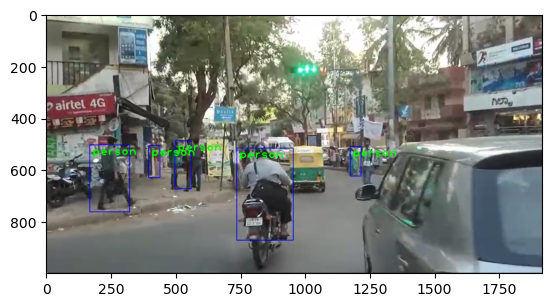

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Constants
CONFIG_FILE = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
FROZEN_MODEL = 'frozen_inference_graph.pb'
LABEL_FILE = 'label.txt'
CONF_THRESHOLD = 0.55

# Load class labels
with open(LABEL_FILE, 'rt') as f:
    class_labels = f.read().rstrip('\n').split('\n')

# Initialize model
model = cv2.dnn_DetectionModel(FROZEN_MODEL, CONFIG_FILE)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# Function to perform object detection on an image
def detect_objects(image):
    class_indices, confidences, boxes = model.detect(image, confThreshold=CONF_THRESHOLD)
    if class_indices is not None and len(class_indices) > 0:
        for class_index, confidence, box in zip(class_indices.flatten(), confidences.flatten(), boxes):
            class_name = class_labels[class_index - 1]  # Adjust for 0-based index
            if class_name == 'person' and confidence > 0.5:  # Adjust confidence threshold as needed
                cv2.rectangle(image, box, (255, 0, 0), 2)
                cv2.putText(image, class_name, (box[0] + 10, box[1] + 40),
                            cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), thickness=3)
            elif class_name == 'traffic light' and confidence > 0.5:  # Adjust confidence threshold as needed
                cv2.rectangle(image, box, (0, 255, 0), 2)
                cv2.putText(image, class_name, (box[0] + 10, box[1] + 40),
                            cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), thickness=3)
    return image

# Process images
def process_image(image_path):
    img = cv2.imread(image_path)
    img_with_detections = detect_objects(img)
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

# Process video
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError("Cannot open video: {}".format(video_path))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_with_detections = detect_objects(frame)
        cv2.imshow('Object Detection', frame_with_detections)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
process_image('traffictrail.png')
process_video('19.mp4')


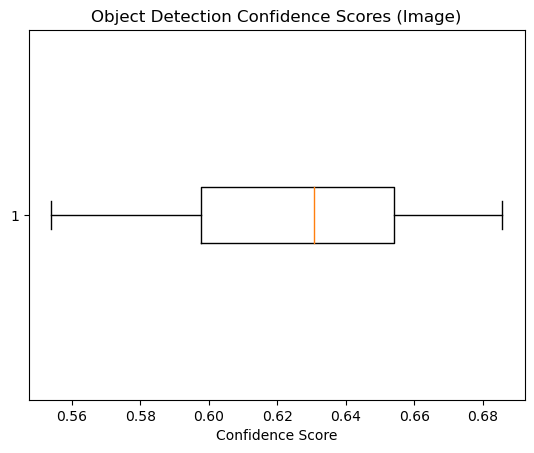

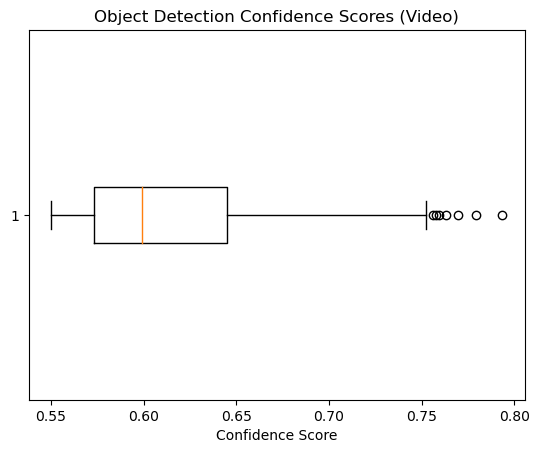

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
CONFIG_FILE = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
FROZEN_MODEL = 'frozen_inference_graph.pb'
LABEL_FILE = 'label.txt'
CONF_THRESHOLD = 0.55

# Load class labels
with open(LABEL_FILE, 'rt') as f:
    class_labels = f.read().rstrip('\n').split('\n')

# Initialize model
net = cv2.dnn_DetectionModel(FROZEN_MODEL, CONFIG_FILE)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

# Function to detect objects and return confidence scores
def detect_objects(image):
    class_ids, confidences, boxes = net.detect(image, confThreshold=CONF_THRESHOLD)
    return confidences.flatten()

# Process image and return confidence scores
def process_image(image_path):
    img = cv2.imread(image_path)
    confidence_scores = detect_objects(img)
    return confidence_scores

# Process video and return confidence scores
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    confidence_scores = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_scores = detect_objects(frame)
        confidence_scores.extend(frame_scores)
    cap.release()
    return confidence_scores

# Example usage for image
image_scores = process_image('traffictrail.png')
plt.boxplot(image_scores, vert=False)
plt.title('Object Detection Confidence Scores (Image)')
plt.xlabel('Confidence Score')
plt.show()

# Example usage for video
video_scores = process_video('19.mp4')
plt.boxplot(video_scores, vert=False)
plt.title('Object Detection Confidence Scores (Video)')
plt.xlabel('Confidence Score')
plt.show()
